# Análisis de Canciones en Spotify

Objetivo: Estimar la probabilidad de que una nueva canción sea del agrado de un usuario, basado en su playlist actual.

Pregunta clave: ¿Qué características de las canciones en una playlist pueden predecir si un nuevo tema será del gusto del usuario?

Contexto: En este análisis, la variable objetivo (label) representa la preferencia del usuario por una canción, y será la variable de salida que deseamos predecir.

https://drive.google.com/file/d/1c1l3OMUFjQWcydV0srKe95LLEfkBMKia/view?usp=sharing

In [1]:
from collections import Counter
import requests

In [2]:
with requests.get(
    "https://drive.google.com/uc?export=download&id=1c1l3OMUFjQWcydV0srKe95LLEfkBMKia"
) as r, open("data_playlist.csv", "wb") as f:
    for chunk in r.iter_content():
        f.write(chunk)

In [3]:
import pandas as pd

spotify_df = pd.read_csv("data_playlist.csv")

## Inspeccionando un dataframe

In [4]:
# vemos los primeros elementos o samples
spotify_df.head(15)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.7130,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.1920,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.3330,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.6010,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.8830,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.5240,0.633,244360,0.401,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.5970,0.507,183573,0.795,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.4520,0.825,259102,0.435,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.7480,0.420,366179,0.324,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.9130,0.292,197613,0.246,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1


In [5]:
spotify_df.tail(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
745,0.000175,0.374,333827,0.943,0.000156,6,0.1250,-4.108,0,0.0556,112.084,4,0.338,0
746,0.001970,0.487,213000,0.867,0.006020,10,0.0968,-3.293,0,0.0543,160.048,4,0.403,0
747,0.916000,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
748,0.168000,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1
749,0.015500,0.477,276720,0.776,0.003140,1,0.2030,-5.056,1,0.0349,131.004,4,0.429,1


In [6]:
# descripción de cada columna e información general del dataframe
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


## Análisis de las Variables

| Variable            | Tipo        | Descripción                                                                 |
|---------------------|-------------|-----------------------------------------------------------------------------|
| **acousticness**     | Continua    | Atributo que mide qué tan acústica es una canción.                          |
| **danceability**     | Continua    | Mide lo apta que es una canción para bailar.                                |
| **duration**         | Discreta    | Duración de una canción en milisegundos.                                    |
| **energy**           | Continua    | Mide la intensidad y actividad percibida de la canción.                     |
| **instrumentalness** | Continua    | Indica la probabilidad de que una pista no contenga voces.                  |
| **key**              | Discreta    | Representa la tonalidad musical de una canción (en semitonos).              |
| **liveness**         | Continua    | Detecta la presencia de una audiencia en la grabación.                      |
| **loudness**         | Continua    | Mide el volumen medio de la canción (en decibelios).                        |
| **mode**             | Binaria     | Indica si una pista está en modo mayor (1) o menor (0).                     |
| **speechiness**      | Continua    | Mide la cantidad de palabras habladas en la pista.                          |
| **tempo**            | Continua    | Mide el ritmo de la canción en beats por minuto (BPM).                      |
| **time_signature**   | Ordinal     | Representa la métrica de la canción (por ejemplo, 4/4).                     |
| **valence**          | Continua    | Mide el carácter musical de una pista en términos de positividad.           |
| **label**            | Binaria     | Variable objetivo que se desea predecir.                                    |

### Clasificación de Variables:

#### Numéricas:
- **Lista**: 
  - `acousticness`, `danceability`, `duration`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, `valence`
  
- **Análisis**:
  - **Tipo**: Continuas y discretas.
  - **Distribución de los datos**: Utilizar histogramas, media, mediana, desviación estándar y percentiles.
  - **Conclusiones esperadas**: 
    - Identificar distribuciones simétricas, sesgadas, o valores atípicos.

#### Categóricas:
- **Lista**:
  - `key`, `mode`, `time_signature`
  
- **Análisis**:
  - **Tipo**: Categóricas y ordinales.
  - **Cardinalidad**: Evaluar el número de categorías y su frecuencia.
  - **Representación**: Usar gráficos de barras o countplots para visualizar la distribución de categorías.
  - **Conclusiones esperadas**: 
    - Determinar categorías raras o comunes y su impacto en el modelo.

### Gráficos sugeridos:

#### Variables Numéricas:
- Histogramas para observar la distribución.
- Boxplots para identificar valores atípicos.

#### Variables Categóricas:
- Gráficos de barras o countplots para visualizar la frecuencia de categorías.





In [7]:
label = spotify_df['label'] == 1
label.head()

0    True
1    True
2    True
3    True
4    True
Name: label, dtype: bool

In [8]:
spotify_df[label]

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.7130,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.1920,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.3330,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.6010,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.8830,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.1250,0.480,110075,0.560,0.000000,1,0.1360,-7.868,1,0.3510,204.162,4,0.571,1
744,0.1240,0.519,242227,0.495,0.006260,6,0.1830,-11.002,0,0.1010,95.078,4,0.262,1
747,0.9160,0.605,125867,0.314,0.000000,0,0.3590,-7.631,1,0.0327,138.148,4,0.836,1
748,0.1680,0.700,249493,0.823,0.000028,3,0.1220,-6.892,1,0.0373,144.060,4,0.745,1


In [9]:
spotify_df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
spotify_df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


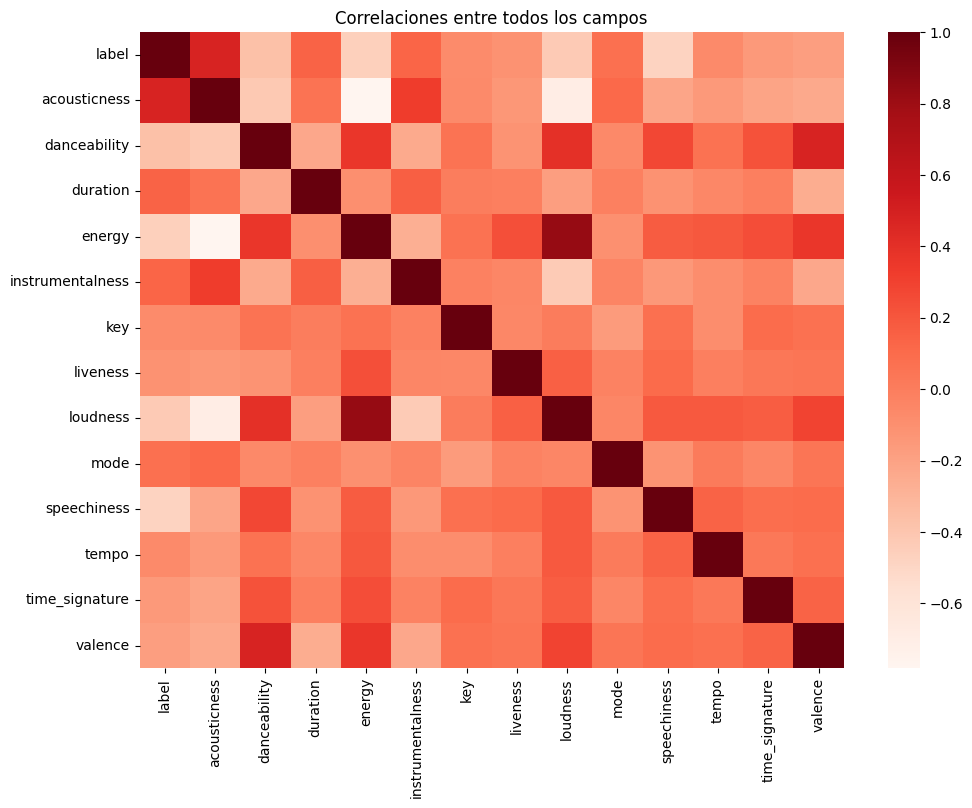

In [12]:


plt.figure(figsize=(6.4 * 2.5, 4.8 * 2.5), dpi=100)
cor = spotify_df[['label', 'acousticness', 'danceability', 'duration', 'energy',
                    'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 
                    'speechiness', 'tempo', 'time_signature', 'valence']].corr()
sns.heatmap(cor,  cmap="Reds")
plt.title("Correlaciones entre todos los campos")
plt.subplots_adjust(bottom=0.35)
plt.subplots_adjust(left=0.35)
plt.savefig('heatmap corr.png')
plt.show()

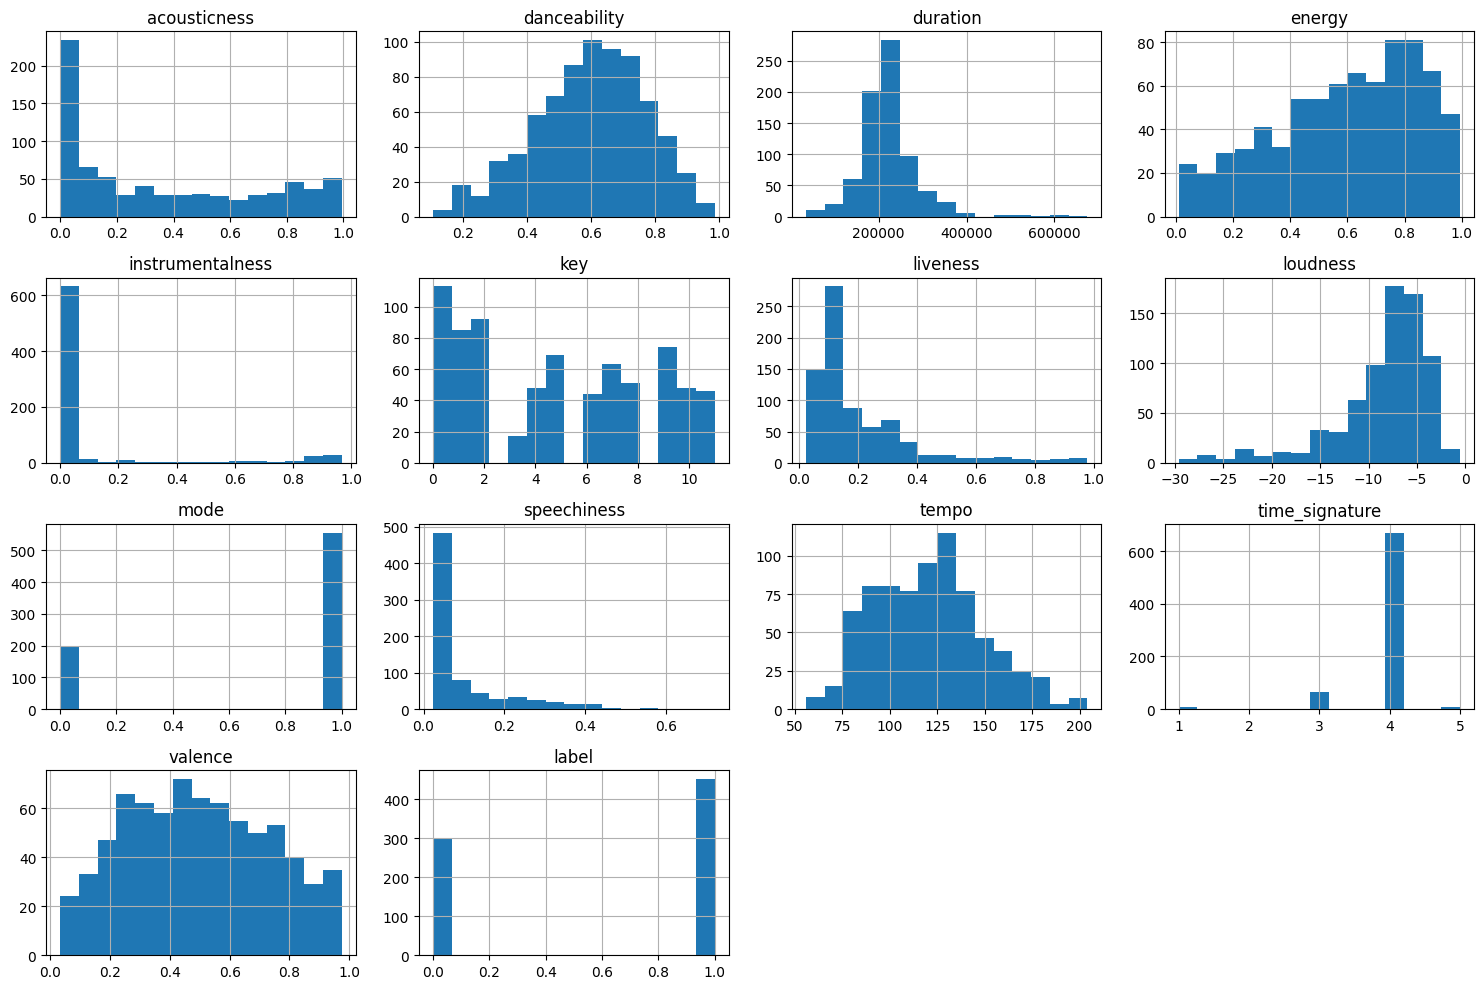

In [13]:
# Verificar la distribución de la variable
numerical_columns = spotify_df.select_dtypes(include=['float64', 'int64']).columns
spotify_df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()
